**Pergunta de Negócio :
Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?**

In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("dataset3.csv")

In [5]:
df.head(10)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
5,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800
7,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df2 = df[df.Categoria == "Office Supplies"]

In [8]:
vendas_por_cidade = df2.groupby("Cidade")["Valor_Venda"].sum()

In [9]:
type(vendas_por_cidade)

pandas.core.series.Series

In [10]:
cidade_maior_venda = vendas_por_cidade.idxmax()
print('A cidade co maior valor de venda da categoria Office Supplies foi:', cidade_maior_venda)

A cidade co maior valor de venda da categoria Office Supplies foi: New York City


**Pergunta de Negócio :
Qual o Total de Vendas Por Data do Pedido?
Demonstre o resultado através de um gráfico de barras.**

In [11]:
vendas_por_data = df.groupby("Data_Pedido")["Valor_Venda"].sum()

In [12]:
type(vendas_por_data)

pandas.core.series.Series

In [13]:
vendas_por_data

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
                ...    
31/10/2017    2346.5790
31/10/2018     523.9280
31/12/2015    5253.2700
31/12/2016    1381.3440
31/12/2017     731.7680
Name: Valor_Venda, Length: 1226, dtype: float64

In [14]:
df_vendas_por_data = vendas_por_data.to_frame()


In [15]:
df_vendas_por_data

,Valor_Venda
Data_Pedido,
01/01/2018,1481.8280
01/02/2015,468.9000
01/02/2017,161.9700
01/03/2015,2203.1510
01/03/2016,1642.1744
...,...
31/10/2017,2346.5790
31/10/2018,523.9280
31/12/2015,5253.2700


Axes(0.125,0.11;0.775x0.77)


<function matplotlib.pyplot.show(close=None, block=None)>

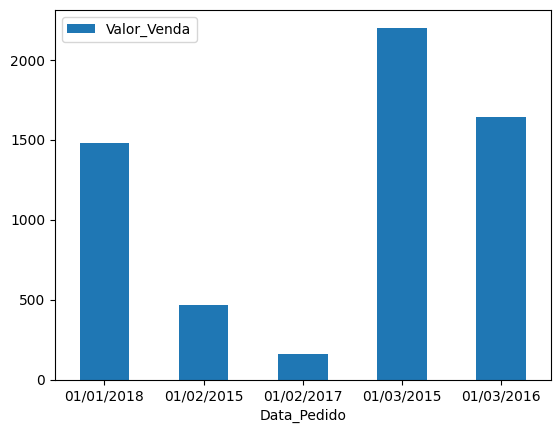

In [16]:
axis = df_vendas_por_data.head().plot.bar(rot=0)
print(axis)
plt.show

**Pergunta de Negócio :
Qual o Total de Vendas por Estado?
Demonstre o resultado através de um gráfico de barras.**

In [17]:
vendas_por_estado = df.groupby("Estado")["Valor_Venda"].sum()

In [18]:
type(vendas_por_estado)

pandas.core.series.Series

In [19]:
df_vendas_por_estado = vendas_por_estado.to_frame()

Axes(0.125,0.11;0.775x0.77)


<function matplotlib.pyplot.show(close=None, block=None)>

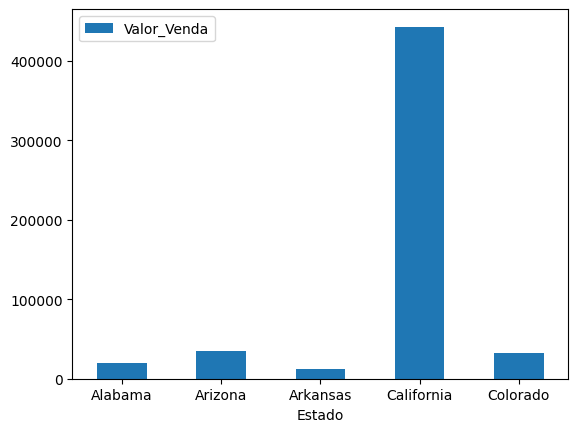

In [20]:
axis = df_vendas_por_estado.head().plot.bar(rot=0)
print(axis)
plt.show

In [21]:
df_vendas_por_estado.shape

(49, 1)

**Pergunta de Negócio :
Quais São as 10 Cidades com Maior Total de Vendas?
Demonstre o resultado através de um gráfico de barras.**

Axes(0.125,0.11;0.775x0.77)


<function matplotlib.pyplot.show(close=None, block=None)>

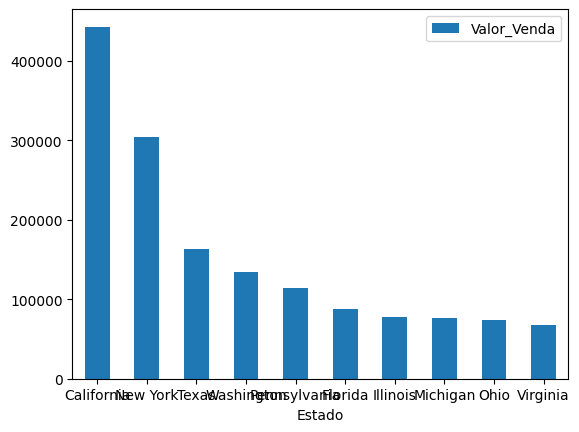

In [22]:
axis = df_vendas_por_estado.nlargest(10,'Valor_Venda').plot.bar(rot=0)  #nlargest organiza em oredem decrecente baseado em uma coluna
print(axis)
plt.show

**Pergunta de Negócio :
Qual Segmento Teve o Maior Total de Vendas?
Demonstre o resultado através de um gráfico de pizza**

In [23]:
df_vendas_por_segmento = df.groupby('Segmento')["Valor_Venda"].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)

In [24]:
type(df_vendas_por_segmento)

pandas.core.frame.DataFrame

In [25]:
df_vendas_por_segmento

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [26]:
#função para converter os dados em valor absoluto, solução do professor:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct* total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

**Explicação da função segundo o chat GPT:**

A função autopct_format recebe um parâmetro chamado values, que é uma lista de valores. Essa função retorna outra função chamada my_format. Vamos analisar o que acontece dentro de my_format.

Dentro de my_format, a primeira linha calcula a soma de todos os valores da lista values e armazena o resultado na variável total.

Em seguida, a linha seguinte calcula o valor percentual (pct) multiplicado pelo total e divide por 100.0. O resultado é arredondado para um número inteiro usando a função int e é armazenado na variável val.

Finalmente, a última linha retorna uma string formatada contendo o valor (val) precedido do símbolo do dólar ('$'). O formato '{v:d}' indica que o valor v deve ser tratado como um número inteiro (d representa decimal). Portanto, a função my_format retorna uma string que representa o valor monetário correspondente ao percentual dado.

Voltando para a função autopct_format, ela simplesmente retorna a função my_format. Essa função pode ser usada posteriormente como um argumento para a formatação de rótulos em gráficos ou outras aplicações semelhantes.

Em resumo, esse código define uma função my_format que recebe um percentual e retorna uma string formatada representando um valor monetário correspondente a esse percentual. A função autopct_format encapsula a função my_format e a retorna para uso posterior.

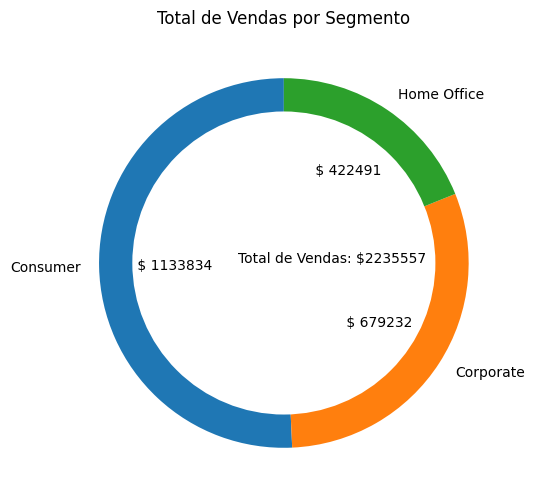

In [27]:
#plot 
#tamanho da figura
plt.figure(figsize = (16,6))

#gráfico de pizza 
plt.pie(df_vendas_por_segmento['Valor_Venda'],
       labels = df_vendas_por_segmento['Segmento'],
       autopct = autopct_format(df_vendas_por_segmento['Valor_Venda']),
       startangle = 90)

#limpa p círculo central, não precisava fazer, ele abre o gráfico e deixa só as bordas
centro_circle = plt.Circle((0,0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centro_circle)

#labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$' + str(int(sum(df_vendas_por_segmento['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas por Segmento')
plt.show()

 **Pergunta de Negócio:
Qual o Total de Vendas Por Segmento e Por Ano?**

In [28]:
#cria uma nova coluna com o ano
df['Ano'] = df['Data_Pedido'].str.split('/').str[2]

In [29]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [30]:
df_total_de_vendas_segmento_ano = df.groupby(["Segmento" , "Ano"])["Valor_Venda"].sum().to_frame()

In [31]:
df_total_de_vendas_segmento_ano

Valor_Venda
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

**Pergunta de Negócio 7:
Os gestores da empresa estão considerando conceder diferentes faixas de descontos e 
gostariam de fazer uma simulação com base na regra abaixo:
Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
Quantas Vendas Receberiam 15% de Desconto?**

In [32]:
df['Desconto%'] =' NAN'

In [33]:
df['Desconto%'] = np.where(df['Valor_Venda'] > 1000, 0.15,0.10)

In [34]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto%
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [35]:
df_vendas_com_desconto_15 = df[df['Desconto%'] == 0.15]

In [36]:
df_vendas_com_desconto_15.shape

(457, 13)

In [37]:
print('Existem', len(df_vendas_com_desconto_15), 'vendas com 15% de desconto.')

Existem 457 vendas com 15% de desconto.


**Pergunta de Negócio:
Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual 
Seria a Média do Valor de Venda Antes e Depois do Desconto?**

In [38]:
df['Valor_com_Desconto'] = df['Valor_Venda'] * 0.85

In [39]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto%,Valor_com_Desconto
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,222.666000
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,622.149000
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,12.427000
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,813.940875
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,19.012800


In [40]:
media_valor_com_desconto = df["Valor_com_Desconto"].mean()
media_valor_sem_desconto = df["Valor_Venda"].mean()

In [41]:
print('A média de valor de venda sem desconto é de R$', media_valor_sem_desconto, " e a média de valor de venda com desconto é de R$", media_valor_com_desconto)

A média de valor de venda sem desconto é de R$ 230.4698922371134  e a média de valor de venda com desconto é de R$ 195.8994084015464


**Pergunta de Negócio 9:
Qual a Média de Vendas Por Segmento, Por Ano e Por Mês?**

In [42]:
#cria uma nova coluna com o ano
df['Mes'] = df['Data_Pedido'].str.split('/').str[1]

In [84]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto%,Valor_com_Desconto,Mes
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,222.666000,11
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,622.149000,11
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,12.427000,06
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,813.940875,10
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,19.012800,10


In [96]:
df_media_vendas = df.groupby(["Segmento","Ano", "Mes"])["Valor_Venda"].mean()

In [97]:
type(df_media_vendas)

pandas.core.series.Series

In [77]:
df_media_vendas

Valor_Venda
Segmento    Ano  Mes             
Consumer    2015 01    146.736787
                 02    117.327926
                 03    152.170564
                 04    189.762750
                 05    191.337439
...                           ...
Home Office 2018 08    176.160606
                 09    249.140597
                 10    412.576597
                 11    247.519423
                 12    224.523983

[144 rows x 1 columns]

 **Pergunta de Negócio 10:
Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 
SubCategorias?
Demonstre tudo através de um único gráfico.**

In [88]:
df_media_vendas_categoria_subcategoria = df.groupby(["Categoria", "SubCategoria"])["Valor_Venda"].sum().to_frame()

In [92]:
df_media_vendas_categoria_subcategoria.nlargest(12, 'Valor_Venda')

Valor_Venda
Categoria       SubCategoria             
Technology      Phones        325271.2940
Furniture       Chairs        317919.6250
Office Supplies Storage       216188.3620
Furniture       Tables        202083.3600
Office Supplies Binders       194723.3810
Technology      Machines      189238.6310
                Accessories   162791.3620
                Copiers       146248.0940
Furniture       Bookcases     108045.0467
Office Supplies Appliances    104061.6930
Furniture       Furnishings    88862.7700
Office Supplies Paper          76312.7640

Axes(0.125,0.11;0.775x0.77)


<function matplotlib.pyplot.show(close=None, block=None)>

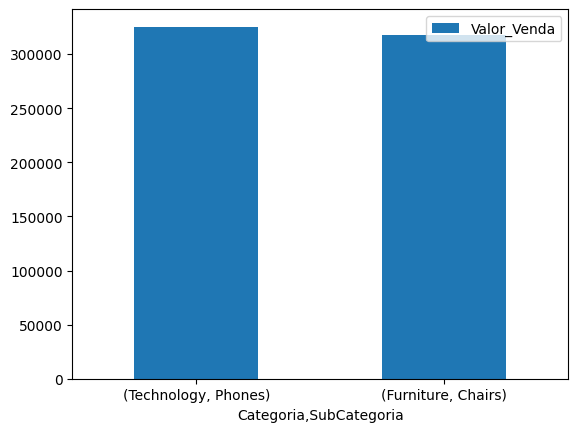

In [95]:
axis = df_media_vendas_categoria_subcategoria.nlargest(2,'Valor_Venda').plot.bar(rot=0)  #nlargest organiza em oredem decrecente baseado em uma coluna
print(axis)
plt.show